In [254]:
#common packages we basically always need
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from time import time
import math
from time import perf_counter

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Oct 18 19:00:09 2017', '__version__': '1.0', '__globals__': [], 'testX': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'testY': array([[7, 2, 1, ..., 4, 5, 6]], dtype=uint8), 'trainY': array([[5, 0, 4, ..., 5, 6, 8]], dtype=uint8), 'trainX': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}


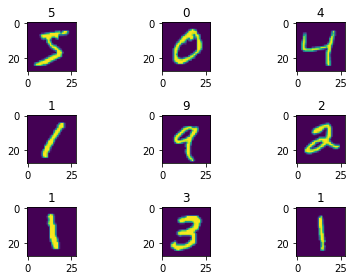

In [255]:
#load the MNIST dataset with binary pixel values
data = sio.loadmat('mnist.mat')
print(data)

Xtrain, Xtest = data['trainX'].astype(float), data['testX'].astype(float)
ytrain, ytest = data['trainY'][0], data['testY'][0]

#pull and plot some samples
for k in range(9):
    plot_data = Xtrain[k,:]
    plot_data = np.reshape(plot_data,(28,28))
    plot_label = ytrain[k]
    plt.subplot(3,3,k+1)
    plt.imshow(plot_data)
    plt.title(plot_label)
plt.tight_layout()

In [256]:
#load the MNIST dataset with binary pixel values
data = sio.loadmat('mnist.mat')
print(data)


select_train = np.logical_or(np.equal(ytrain,4),np.equal(ytrain,9))
select_test = np.logical_or(np.equal(ytest,4),np.equal(ytest,9))
Xtrain = Xtrain[select_train,:]
Xtest = Xtest[select_test,:]
ytrain = np.sign(np.equal(ytrain[select_train],4.)-.5)
ytest = np.sign(np.equal(ytest[select_test],4.)-.5)


m,n = Xtrain.shape
mt = Xtest.shape[0]

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Oct 18 19:00:09 2017', '__version__': '1.0', '__globals__': [], 'testX': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'testY': array([[7, 2, 1, ..., 4, 5, 6]], dtype=uint8), 'trainY': array([[5, 0, 4, ..., 5, 6, 8]], dtype=uint8), 'trainX': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}


In [257]:
def getLossFunction(theta):
    totalSum = 0
    for i in range(0, m):
        firstMult = ytrain[i] * Xtrain[i].T
        secondMult = firstMult@theta
        res = sigmoid(secondMult)
        totalSum += np.log(res)
    totalSum = totalSum / m
    totalSum = totalSum * -1
    return totalSum

def sigmoid(s):
    return 1 / (1 + np.exp(-s))

def getGradient(theta):
    totalSum = 0
    for i in range(0, m):
        totalSum += helperGradient(theta, i)
    return totalSum / m

def helperGradient(theta, i):
    firstMult = np.dot(ytrain[i],Xtrain[i].T)
    secondMult = np.dot(firstMult, theta)
    resbefore = sigmoid(secondMult) - 1
    resMultExtra = np.dot(resbefore, ytrain[i])
    resFinalMult = np.dot(resMultExtra, Xtrain[i])
    return resFinalMult

# TEST SCRIPT. DO NOT MODIFY!
theta = np.linspace(-.1,.1,n)
print('Check number: ', getLossFunction(theta),np.sum(getGradient(theta)))


Check number:  45.19215648734918 12343.17694760448


In [258]:
def getClassifRate(theta, x, y):
    newArrForYHat = [0] * len(y)
    for i in range(0, len(y)):
        if np.dot(theta, x[i].T) <= 0: #in the slides formula used
            #ypred = sign(x^T Theta MLE) in {-1,1}
            newArrForYHat[i] = -1
        else:
            newArrForYHat[i] = 1
    totalSum = 0

    for i in range(0, len(y)):
        if newArrForYHat[i] == y[i]:
            totalSum += 1

    return totalSum / len(y)

print("Classification Accuracy is :", getClassifRate(theta, Xtrain, ytrain))

def gradientDescent(theta, stepsize):
    # subtracting this from the stepsize * getGradient of Theta
    return theta - (getGradient(theta)* stepsize)

trainAccuracyArr = []
testAccuracyArr = []
trainingLossArr = []

timeStart = perf_counter()

for i in range(0, 1500):
    theta = gradientDescent(theta, 10**(-6))
    if i % 10 == 0:
        trainLoss = getLossFunction(theta)
        trainAccur = getClassifRate(theta, Xtrain, ytrain)
        testAccur = getClassifRate(theta, Xtest, ytest)

        trainAccuracyArr.append(trainAccur)
        testAccuracyArr.append(testAccur)
        trainingLossArr.append(trainLoss)
timeEnd = perf_counter()


Classification Accuracy is : 0.49546264099737086


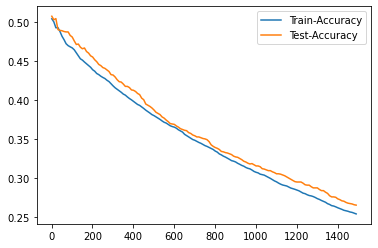

The time taken to do gradient descent :  228.57369270000163
Final Train MisClassification Accuracy: 0.25443134594182004
Final Test MisClassification Accuracy: 0.26569563033651433
Final Train Loss is : 7.429541037850054


In [259]:
xAxis = np.arange(1, 1500 + 1, 10)
missClassTrainArr = []
missClassTestArr = []

for train in trainAccuracyArr:
    missClassTrainArr.append(1-train)

for test in testAccuracyArr:
    missClassTestArr.append(1-test)

plt.plot(xAxis, missClassTrainArr, label = "Train-Accuracy")
plt.plot(xAxis, missClassTestArr, label = "Test-Accuracy")
plt.legend()
plt.show()

print("The time taken to do gradient descent : ", timeEnd-timeStart)
print("Final Train MisClassification Accuracy:", missClassTrainArr[-1])
print("Final Test MisClassification Accuracy:", missClassTestArr[-1])
print("Final Train Loss is :", trainingLossArr[-1])


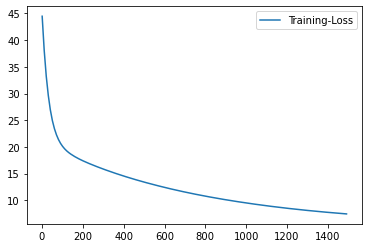

In [260]:
xAxis = np.arange(1, 1500 + 1, 10)

plt.plot(xAxis,trainingLossArr, label = "Training-Loss")
plt.legend()
plt.show()

In [261]:
def getStochGradient(theta, minibatch):
    totalSum = 0
    for i in minibatch:
        totalSum += helperGradient(theta, i)
    return totalSum / len(minibatch)

def stoch_gradient_descent(theta, minibatch,stepsize):
    res = theta - (stepsize*getStochGradient(theta, minibatch))
    return res

# TEST SCRIPT. DO NOT MODIFY!
theta = np.linspace(-.1,.1,n)
print('Check number: ',np.sum(getStochGradient(theta,[1,4,6,2])))

Check number:  5803.5


In [262]:
start = time()

def creatingNewBatches():
    minibatch = 0
    tempArr = []
    minibatchesFinal = []
    for i in range(0, len(Xtrain)):
        minibatch += 1
        if minibatch >= 50:
            minibatch = 0
            tempArr.append(i)
            minibatchesFinal.append(tempArr)
            tempArr = []
        else:
            tempArr.append(i)
    for arr in minibatchesFinal: #shuffles the arrays inside
            np.random.shuffle(arr)
    return minibatchesFinal

minibatchesFinal = creatingNewBatches()

trainAccuracyArr2 = []
testAccuracyArr2 = []
trainingLossArr2 = []
counterToShuffle = 0
timeStart2 = perf_counter()

for i in range(1, 50001):
    theta = stoch_gradient_descent(theta,minibatchesFinal[counterToShuffle], 10**(-6))
    if i % 100 == 0:
        if counterToShuffle % (len(minibatchesFinal)-1) == 0:
            #then we shuffle it again and rinse and repeat
            minibatchesFinal = creatingNewBatches() #shuffles and makes new batches
            counterToShuffle = 0
        trainingLoss2 = getLossFunction(theta)
        trainAccur2 = getClassifRate(theta, Xtrain, ytrain)
        testAccur2 = getClassifRate(theta, Xtest, ytest)

        trainAccuracyArr2.append(trainAccur2)
        testAccuracyArr2.append(testAccur2)
        trainingLossArr2.append(trainingLoss2)
        counterToShuffle += 1
        
timeEnd2 = perf_counter()

In [263]:
xAxis2 = np.arange(1, 50001, 100)

missClassTrainArr2 = []
missClassTestArr2 = []

for train in trainAccuracyArr2:
    missClassTrainArr2.append(1-train)

for test in testAccuracyArr2:
    missClassTestArr2.append(1-test)

print("The time taken to do Stotch gradient descent : ", timeEnd2-timeStart2)
print("Final Train MisClassification Rate Accuracy:", missClassTrainArr2[-1])
print("Final Test MisClassification Accuracy:", missClassTestArr2[-1])
print("Final Train Loss is :", trainingLossArr2[-1])

The time taken to do Stotch gradient descent :  82.75658759999897
Final Train MisClassification Rate Accuracy: 0.06360783648545498
Final Test Classification Accuracy: 0.06931190356604722
Final Train Loss is : 1.7629675157017408


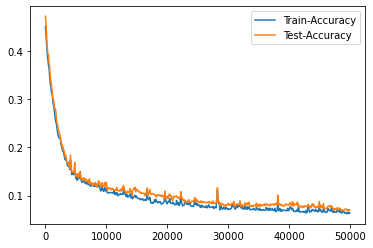

In [264]:
plt.plot(xAxis2, missClassTrainArr2, label = "Train-Accuracy")
plt.plot(xAxis2, missClassTestArr2, label = "Test-Accuracy")
plt.legend()
plt.show()

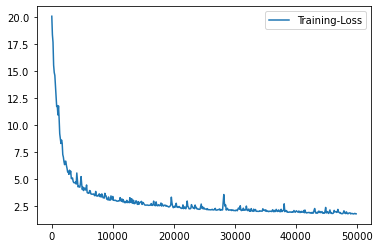

In [265]:
xAxis2 = np.arange(1, 50001, 100)
plt.plot(xAxis2, trainingLossArr2, label = "Training-Loss")
plt.legend()
plt.show()